In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
df = pd.DataFrame(np.random.randint(20, 100, size=(20000,5)), columns=['s1','s2','s3','s4','s5'])
df.head()

,s1,s2,s3,s4,s5
0,51,24,80,53,23
1,83,89,52,85,48
2,40,79,65,41,60
3,55,49,42,93,40
4,70,90,40,83,75


In [3]:
df["obtained"] = df[['s1','s2','s3','s4','s5']].apply(lambda x: np.sum(x), axis=1)
df['percentage'] = df['obtained'] / 500 * 100

def grade(x):
    if x>=80:
        return "A+"
    elif x>=70:
        return "A"
    elif x>=60:
        return "B"
    elif x>=50:
        return "C"
    elif x>=40:
        return "D"
    elif x>=33:
        return "E"
    else:
        return "F"
df['grade'] = df.percentage.apply(grade)

#vectorization
dic = {v:k for k,v in enumerate(df.grade.unique())}

df['grade1'] = df.grade.map(dic)
df.head()

,s1,s2,s3,s4,s5,obtained,percentage,grade,grade1
0,51,24,80,53,23,231,46.2,D,0
1,83,89,52,85,48,357,71.4,A,1
2,40,79,65,41,60,285,57.0,C,2
3,55,49,42,93,40,279,55.8,C,2
4,70,90,40,83,75,358,71.6,A,1


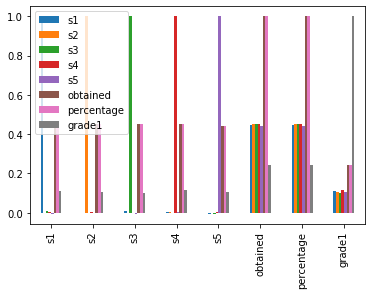

In [4]:
df.corr().plot(kind='bar')

# Try to get grade with Deep learning 

In [19]:
data = df[['s1','s2','s3','s4','s5','grade']]
data.head(2)

,s1,s2,s3,s4,s5,grade
0,51,24,80,53,23,D
1,83,89,52,85,48,A


In [20]:
X = df[['s1','s2','s3','s4','s5']]
Y = pd.get_dummies(df['grade'])
Y.head(2)

,A,A+,B,C,D,E,F
0,0,0,0,0,1,0,0
1,1,0,0,0,0,0,0


In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 
from tensorflow.keras.optimizers import Adam, SGD

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [54]:
model = Sequential()
model.add(Dense(5, activation='relu',input_shape=(5,)))
model.add(Dense(7, activation='softmax'))

In [55]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_5 (Dense)              (None, 7)                 42        
Total params: 72
Trainable params: 72
Non-trainable params: 0
_________________________________________________________________


In [78]:
model.compile(optimizer=SGD(lr=0.8),
             loss='categorical_crossentropy',
             metrics=['acc'])

In [79]:
model.fit(X,Y, epochs=30)

Epoch 1/30
625/625 [==============================] - 0s 660us/step - loss: 1.5009 - acc: 0.3275
Epoch 2/30
625/625 [==============================] - 0s 676us/step - loss: 1.4975 - acc: 0.3227
Epoch 3/30
625/625 [==============================] - 0s 724us/step - loss: 1.4946 - acc: 0.3259
Epoch 4/30
625/625 [==============================] - 0s 672us/step - loss: 1.4943 - acc: 0.3291
Epoch 5/30
625/625 [==============================] - 0s 684us/step - loss: 1.4945 - acc: 0.3283
Epoch 6/30
625/625 [==============================] - 0s 682us/step - loss: 1.4947 - acc: 0.3286
Epoch 7/30
625/625 [==============================] - 0s 673us/step - loss: 1.4937 - acc: 0.3286
Epoch 8/30
625/625 [==============================] - 0s 685us/step - loss: 1.4953 - acc: 0.3255
Epoch 9/30
625/625 [==============================] - 0s 687us/step - loss: 1.4951 - acc: 0.3237
Epoch 10/30
625/625 [==============================] - 0s 689us/step - loss: 1.4947 - acc: 0.3316
Epoch 11/30
625/625 [========

In [63]:
df1 = pd.DataFrame(np.random.randint(50, 100, size=(10,5)), columns=['s1','s2','s3','s4','s5'])


In [64]:
df1

,s1,s2,s3,s4,s5
0,91,56,87,95,75
1,64,54,82,72,51
2,68,99,91,60,98
3,78,57,94,89,95
4,59,87,92,60,71
5,69,50,66,69,73
6,56,77,56,57,58
7,53,96,74,74,96
8,66,61,92,50,82
9,87,88,83,61,56


In [71]:
df1['predict']=Y.columns.take(np.argmax(model.predict(df1),axis=1))
df1




,s1,s2,s3,s4,s5,predict
0,91,56,87,95,75,A
1,64,54,82,72,51,B
2,68,99,91,60,98,A
3,78,57,94,89,95,A
4,59,87,92,60,71,B
5,69,50,66,69,73,B
6,56,77,56,57,58,B
7,53,96,74,74,96,A
8,66,61,92,50,82,B
9,87,88,83,61,56,A


In [66]:
df1.head()

,s1,s2,s3,s4,s5
0,91,56,87,95,75
1,64,54,82,72,51
2,68,99,91,60,98
3,78,57,94,89,95
4,59,87,92,60,71


In [62]:
Y

,A,A+,B,C,D,E,F
0,0,0,0,0,1,0,0
1,1,0,0,0,0,0,0
2,0,0,0,1,0,0,0
3,0,0,0,1,0,0,0
4,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...
19995,1,0,0,0,0,0,0
19996,1,0,0,0,0,0,0
19997,0,0,0,1,0,0,0
19998,0,0,1,0,0,0,0
